In [1]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.manifold import TSNE
from scipy.spatial import distance

Using Theano backend.
Using gpu device 0: GeForce GTX 1060 (CNMeM is enabled with initial size: 80.0% of memory, cuDNN 5110)
/home/andrey/anaconda3/lib/python3.5/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
/home/andrey/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/andrey/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Загружаем предварительно обученную сеть VGG16

In [2]:
model = VGG16(weights='imagenet', include_top=False)

## Загружаем фото паспорта

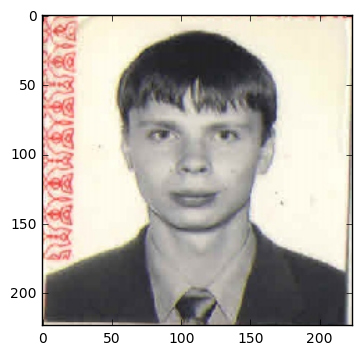

In [3]:
img = image.load_img('sozykin_passport.jpg', target_size=(224, 224))
plt.imshow(img)
plt.show()

## Преобразуем фото в массив numpy

In [4]:
pass_foto = image.img_to_array(img)
pass_foto = np.expand_dims(pass_foto, axis=0)
pass_foto = preprocess_input(pass_foto)

## Получаем вектор признаков

In [5]:
features_pass = model.predict(pass_foto)

In [6]:
print(features_pass)

[[[[  0.           7.70695782   0.         ...,   0.           0.           0.        ]
   [  0.           0.           0.         ...,   0.           0.           0.        ]
   [  0.           0.           0.         ...,   0.           0.           0.        ]
   ..., 
   [  0.           0.           0.         ...,   0.           0.           0.        ]
   [  0.           0.           0.         ...,   0.           0.           0.        ]
   [  0.           0.           0.         ...,   0.           0.           0.        ]]

  [[  0.          23.24532127  18.69490623 ...,   0.           0.           0.        ]
   [  0.           0.           0.         ...,   0.           0.           0.        ]
   [  0.           0.           0.         ...,   0.           0.           0.        ]
   ..., 
   [  0.           0.           0.         ...,   0.           0.           0.        ]
   [  0.           0.           0.         ...,   0.           0.           0.        ]
   [  0.    

## Загружаем фотo c Web-камеры

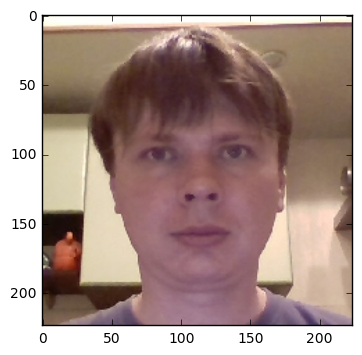

In [7]:
img = image.load_img('sozykin_webcam.jpg', target_size=(224, 224))
plt.imshow(img)
plt.show()

## Преобразуем фото в массив numpy

In [8]:
webcam_foto = image.img_to_array(img)
webcam_foto = np.expand_dims(webcam_foto, axis=0)
webcam_foto = preprocess_input(webcam_foto)

## Получаем вектор признаков

In [9]:
features_webcam = model.predict(webcam_foto)

In [10]:
print(features_webcam)

[[[[  0.           0.           0.         ...,   0.           0.           0.        ]
   [  0.           0.           0.         ...,   0.           0.           0.        ]
   [  0.           0.           0.         ...,   0.           0.           0.        ]
   ..., 
   [  0.           0.           0.         ...,   0.           0.           0.        ]
   [  0.           0.           0.         ...,   0.           0.           0.        ]
   [  0.           0.           0.         ...,   0.           0.           0.        ]]

  [[  0.           0.           0.         ...,   0.           0.           0.        ]
   [  0.           0.           0.         ...,   0.           0.           0.        ]
   [  0.           0.           0.         ...,   0.           0.           0.        ]
   ..., 
   [  0.           0.           0.         ...,   0.           0.           0.        ]
   [  0.           0.           0.         ...,   0.           0.           0.        ]
   [  0.    

## Рассчитываем расстояние между векторами

In [11]:
a = distance.euclidean(features_pass.flatten(), features_webcam.flatten())
print(a)

1217.126708984375
